In [1]:
#importing librarires
import pandas as pd
import pickle
import joblib
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

In [3]:
#importing imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
#import flight aviation dataset
df = pd.read_csv('Combined_Flights_2022.csv')

In [5]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


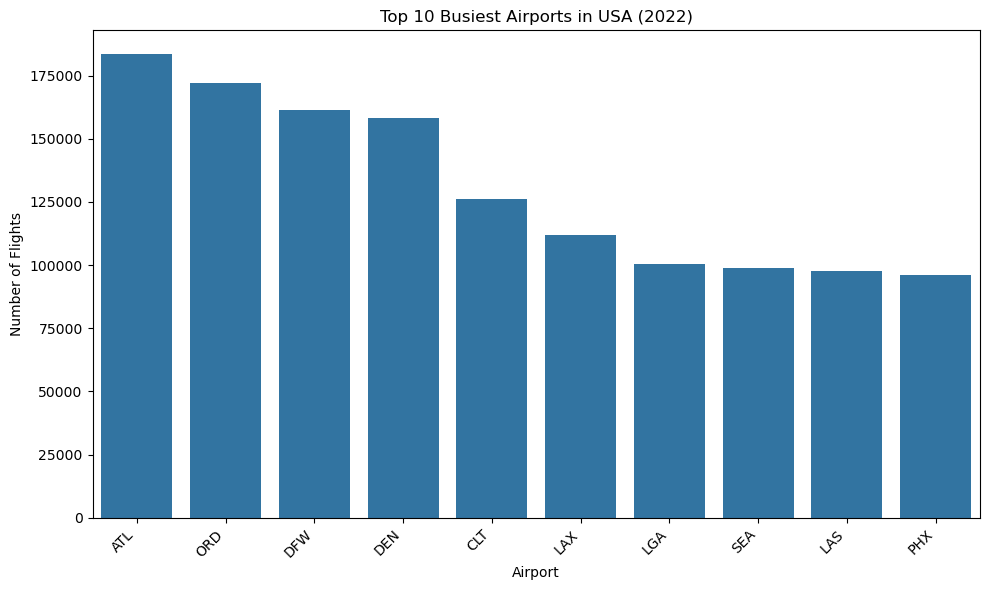

In [6]:
#Displaying the top 10 most busiest airports in USA (2022)
#These airports have a higher probability of having flight delays
busy_airports = df['Origin'].value_counts().nlargest(10)
busy_airports

plt.figure(figsize=(10, 6))
sb.barplot(x=busy_airports.index, y=busy_airports.values)
plt.title('Top 10 Busiest Airports in USA (2022)')
plt.xlabel('Airport')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
#Displaying * columns available in the dataset
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [8]:
#datatypes of the attributes
df.dtypes

FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings      int64
Length: 61, dtype: object

In [9]:
#since, the dataset is too large and requires more computational power, had to create a subset of the dataset where we used the most busisest airport to train the data
specific_origin_airport = ['ATL']  
filtered_flights = df[df['Origin'].isin(specific_origin_airport)]
filtered_flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
1855,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,820,832.0,12.0,12.0,...,845.0,1000.0,4.0,1000,4.0,0.0,0.0,1000-1059,4,0
1856,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1440,1505.0,25.0,25.0,...,1516.0,1625.0,7.0,1615,17.0,1.0,1.0,1600-1659,4,0
1857,2022-04-01,Southwest Airlines Co.,ATL,AUS,False,False,1955,2105.0,70.0,70.0,...,2123.0,2232.0,5.0,2135,62.0,1.0,4.0,2100-2159,4,0
1858,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,1510,1547.0,37.0,37.0,...,1601.0,1539.0,8.0,1510,37.0,1.0,2.0,1500-1559,1,0
1859,2022-04-01,Southwest Airlines Co.,ATL,BNA,False,False,820,819.0,0.0,-1.0,...,833.0,813.0,5.0,835,-17.0,0.0,-2.0,0800-0859,1,0


In [10]:
#getting id cols because, they are irrelevant to make predictions
remove_id_cols = ['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID','DestAirportID', 
                  'DestAirportSeqID', 'DestCityMarketID', 'OriginWac', 'DestWac']

In [11]:
#getting the redundant city and state names, because it only needs 'origin' and 'dest' to predict the status from the cities
remove_city_cols = ['OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName', 'OriginStateFips', 'DestStateFips']

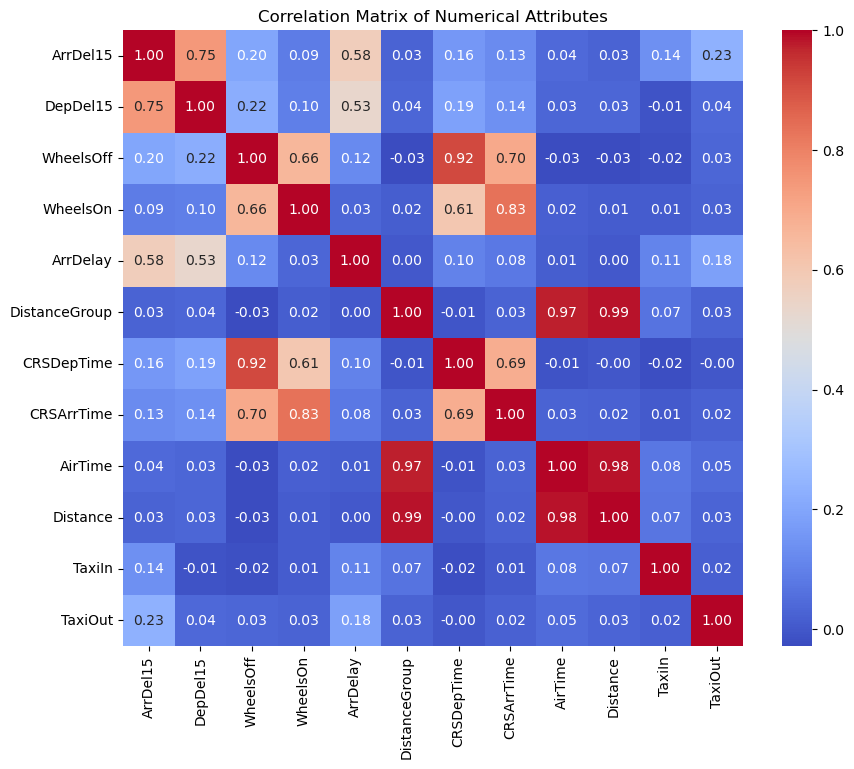

In [12]:
#creating correlation matrix on numerical columns to get a better idea about how data is associated
numerical_features = df[['ArrDel15','DepDel15', 'WheelsOff' , 'WheelsOn','ArrDelay','DistanceGroup','CRSDepTime', 
                         'CRSArrTime', 'AirTime', 'Distance', 'TaxiIn','TaxiOut',]]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [13]:
#getting the irrelevant time specific columns to be removed since, it only need the the scheduled times to predict the status of a plane before it parts.
#ArrDel15 and DepDel15 have a strong positive correlation, indicating that when a flight departs late, it is also likely to arrive late.
#Since, we are taking the target attribute as "Cancelled", ArDel15 and DepDel15 are irrelevant to the model
remove_time_cols = ['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrDelayMinutes','AirTime' , 
                    'ActualElapsedTime', 'ArrDelay', 'ArrDel15', 'DepDel15' , 'WheelsOff', 'WheelsOn', 'TaxiOut', 'TaxiIn']

In [14]:
#removing diverted columns, where the "Diverted" attribute shows if the flight was diverted or not
remove_diverted_cols = ['Diverted', 'DivAirportLandings']

In [15]:
#distance is removed because, it is not required to predict the status of a flight and does not impact the status or the target variable
remove_distance = ['Distance']

In [16]:
#elimainating the 'Cancelled' attribute, which is the target variable to be predicted. It is later added to the transformed dataset before training the model
remove_cancelled = ['Cancelled']

In [17]:
#concatenating all column lists which needs to be dropped
columns_to_drop = remove_id_cols + remove_city_cols + remove_time_cols + remove_diverted_cols + remove_distance + remove_cancelled

In [18]:
#dropping the irrelevant and redundant columns from the dataset
cleaned_flights = filtered_flights.drop(columns=columns_to_drop)

In [19]:
#Required columns for status prediction
required_cols = ['Airline', 'Operating_Airline', 'CRSDepTime', 'CRSArrTime', 
                 'ArrTime' , 'CRSElapsedTime' , 'Origin', 'Dest', 
                 'Month', 'DayofMonth', 'DayOfWeek']

In [20]:
cleaned_flights = cleaned_flights[required_cols]

In [21]:
#Displaying the cleaned flights data
cleaned_flights.head()

,Airline,Operating_Airline,CRSDepTime,CRSArrTime,ArrTime,CRSElapsedTime,Origin,Dest,Month,DayofMonth,DayOfWeek
1855,Southwest Airlines Co.,WN,820,1000,1004.0,160.0,ATL,AUS,4,1,5
1856,Southwest Airlines Co.,WN,1440,1615,1632.0,155.0,ATL,AUS,4,1,5
1857,Southwest Airlines Co.,WN,1955,2135,2237.0,160.0,ATL,AUS,4,1,5
1858,Southwest Airlines Co.,WN,1510,1510,1547.0,60.0,ATL,BNA,4,1,5
1859,Southwest Airlines Co.,WN,820,835,818.0,75.0,ATL,BNA,4,1,5


In [22]:
#displaying data types of the cleaned dataset
print(cleaned_flights.dtypes)

Airline               object
Operating_Airline     object
CRSDepTime             int64
CRSArrTime             int64
ArrTime              float64
CRSElapsedTime       float64
Origin                object
Dest                  object
Month                  int64
DayofMonth             int64
DayOfWeek              int64
dtype: object


In [23]:
cleaned_flights.duplicated().sum()

0

In [24]:
#dropping duplicates
cleaned_flights = cleaned_flights.drop_duplicates()

In [25]:
#finding missing values
missingValues = cleaned_flights.isnull().sum()
print("Missing Values : ")
print(missingValues)

Missing Values : 
Airline                 0
Operating_Airline       0
CRSDepTime              0
CRSArrTime              0
ArrTime              3453
CRSElapsedTime          0
Origin                  0
Dest                    0
Month                   0
DayofMonth              0
DayOfWeek               0
dtype: int64


In [26]:
#Removing rows with missing values
cleaned_flights = cleaned_flights.dropna(subset=['ArrTime'])

In [27]:
#verifying missing values
print(cleaned_flights.isna().sum())

Airline              0
Operating_Airline    0
CRSDepTime           0
CRSArrTime           0
ArrTime              0
CRSElapsedTime       0
Origin               0
Dest                 0
Month                0
DayofMonth           0
DayOfWeek            0
dtype: int64


In [28]:
#defining the transformers for numerical and categorical features
num_features = cleaned_flights.select_dtypes(include='number').columns.to_list()
cat_features = cleaned_flights.select_dtypes(exclude='number').columns.to_list()

In [29]:
print(num_features)
print('and')
print(cat_features)

['CRSDepTime', 'CRSArrTime', 'ArrTime', 'CRSElapsedTime', 'Month', 'DayofMonth', 'DayOfWeek']
and
['Airline', 'Operating_Airline', 'Origin', 'Dest']


In [30]:
#creating data frames
categorical_data = cleaned_flights[cat_features]
numerical_data = cleaned_flights[num_features]

In [31]:
categorical_transformer = LabelEncoder()
numerical_transformer = StandardScaler()

In [32]:
#setting estimators and transformations using ColumnTransformer
preprocessor = ColumnTransformer(
                    transformers=[
                           ('num', numerical_transformer, num_features),
                           ('cat', categorical_transformer, cat_features)
                ],
                remainder='passthrough'
)

In [33]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['CRSDepTime', 'CRSArrTime', 'ArrTime',
                                  'CRSElapsedTime', 'Month', 'DayofMonth',
                                  'DayOfWeek']),
                                ('cat', LabelEncoder(),
                                 ['Airline', 'Operating_Airline', 'Origin',
                                  'Dest'])])

In [34]:
transformed_numeric = numerical_transformer.fit_transform(numerical_data)

In [35]:
#used label encoder to transform the categorical data
categorical_data.loc[:, 'Airline'] = categorical_transformer.fit_transform(categorical_data['Airline'])
categorical_data.loc[:, 'Operating_Airline'] = categorical_transformer.fit_transform(categorical_data['Operating_Airline'])
categorical_data.loc[:, 'Origin'] = categorical_transformer.fit_transform(categorical_data['Origin'])
categorical_data.loc[:, 'Dest'] = categorical_transformer.fit_transform(categorical_data['Dest'])

In [36]:
#combining the transformed numerical and categorical data
combined_df = pd.concat([numerical_data, categorical_data], axis=1)

In [37]:
combined_df.head()

,CRSDepTime,CRSArrTime,ArrTime,CRSElapsedTime,Month,DayofMonth,DayOfWeek,Airline,Operating_Airline,Origin,Dest
1855,820,1000,1004.0,160.0,4,1,5,11,11,0,10
1856,1440,1615,1632.0,155.0,4,1,5,11,11,0,10
1857,1955,2135,2237.0,160.0,4,1,5,11,11,0,10
1858,1510,1510,1547.0,60.0,4,1,5,11,11,0,15
1859,820,835,818.0,75.0,4,1,5,11,11,0,15


In [38]:
#checking for sparse/dense
if hasattr(combined_df, "toarray"):  
    combined_df = combined_df.toarray()  

In [39]:
#re-checking the shape
print("Shape after conversion:", combined_df.shape)

Shape after conversion: (180244, 11)


In [40]:
#condition to check wheather a particular flight is cancelled
combined_df['Cancelled'] = (combined_df['ArrTime'].isna() | (combined_df['ArrTime'] > combined_df['CRSArrTime'])).astype(int)

In [41]:
#defining feature variable(X) and target variable(y)
X = combined_df.drop(columns=['Cancelled'])
y = combined_df['Cancelled']

In [42]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((144195, 11), (144195,), (36049, 11), (36049,))

In [44]:
#applying SMOTE to oversample the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [54]:
#creating the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9473217010180588


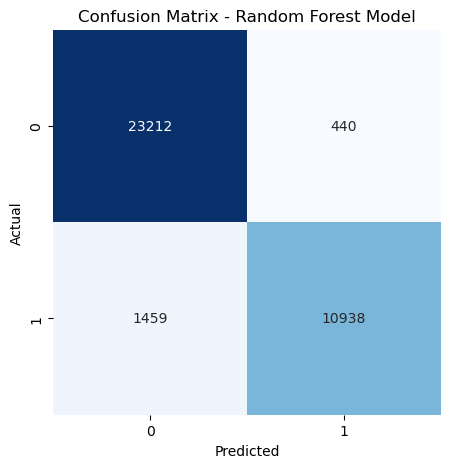

In [46]:
def plot_Cmatrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sb.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#plotting confusion matrix for Random Forest model
plot_Cmatrix(y_test, rf_pred, title='Confusion Matrix - Random Forest Model')

In [47]:
#classification report for Random Forest model
print("\nClassification Report - Random Forest Model:")
print(classification_report(y_test, rf_pred))


Classification Report - Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     23652
           1       0.96      0.88      0.92     12397

    accuracy                           0.95     36049
   macro avg       0.95      0.93      0.94     36049
weighted avg       0.95      0.95      0.95     36049



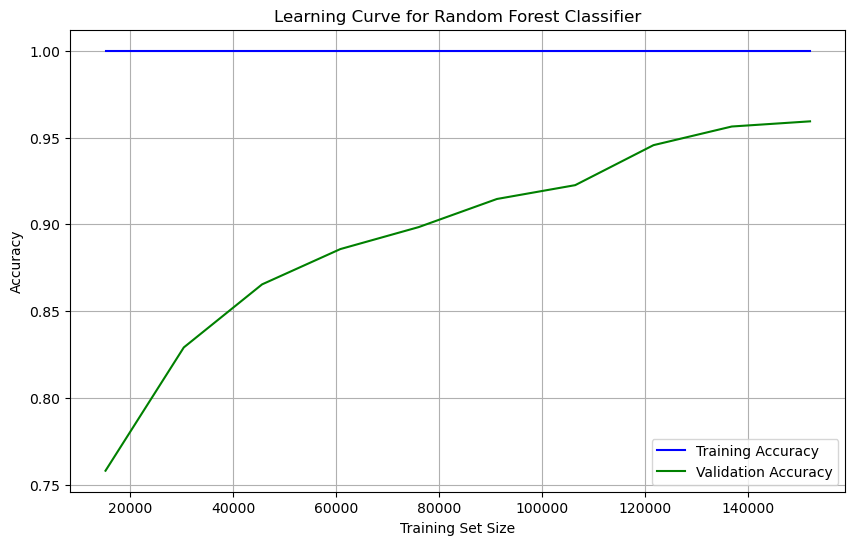

In [48]:
#plotting a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_resampled, y_train_resampled, 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5,  
    scoring='accuracy',  
    n_jobs=-1  
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')

plt.title('Learning Curve for Random Forest Classifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [49]:
#applying "Randomized Search with Cross-Validation" in hyperparameter tuning
#defining the parameter grid
parameter_grid = {
    'n_estimators': [30, 40, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]

}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=parameter_grid, n_iter=10, 
                                   scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_pred = random_search.best_estimator_.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print("Best Random Forest Accuracy:", best_accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Accuracy: 0.9461011401148437


In [50]:
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [58]:
#save the model
filename = 'flightmodel.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [59]:
#loading the model
load_model = pickle.load(open(filename, 'rb'))

In [62]:
#test 2
input_data = [[500, 920, 1200.0, 200.0, 5, 2, 5, 10, 11, 0, 10]]
input_df = pd.DataFrame(input_data, columns=['CRSDepTime', 'CRSArrTime', 'ArrTime', 'CRSElapsedTime', 
                                             'Month', 'DayofMonth', 'DayOfWeek','Airline', 
                                             'Operating_Airline', 'Origin', 'Dest'])

prediction = load_model.predict(input_df)
print("Prediction:", prediction)

if(prediction[0] == 0):
    print("The flight is not cancelled")
else:
    print("The flight is cancelled")

Prediction: [1]
The flight is cancelled
